# Examples for the Fourier Interferometer Module

The `fourier_interferometer` module provides functions to decompose arbitrary $N \times N$ unitary matrices into a product of phase masks interleaved with discrete Fourier transform (DFT) matrices. This allows to design universal multiport optical devices that can perform linear transformations on a set of $N$ spatially encoded optical modes. The functions `fourier_decomposition` and `compact_fourier_decomposition` in this module provide constructive algorithms to perform this decomposition using $4N + 1$ and $2N+5$ phase masks respectively.

## 1. Perform the Decomposition

In [1]:
# Import dependencies
import numpy as np
from scipy.stats import unitary_group
from unitary_decomp.fourier_interferometer import compact_fourier_decomposition, circuit_reconstruction
np.set_printoptions(precision=3, suppress=True, linewidth=150)

We start by generating a random unitary matrix of dimension $N$.

In [2]:
# Dimension of the unitary matrix
DIM = 6

# Generate a random unitary matrix of dimension DIM
U = unitary_group(DIM, seed=137).rvs()

print("Random unitary matrix U:\n")
print(U)

Random unitary matrix U:

[[ 0.329-0.288j  0.189+0.111j  0.729+0.078j -0.061-0.11j   0.292+0.087j  0.214+0.262j]
 [ 0.242-0.368j  0.182+0.039j -0.146+0.232j  0.22 +0.637j  0.162-0.413j -0.194-0.084j]
 [ 0.038+0.237j  0.349+0.292j  0.255-0.258j -0.015+0.456j -0.576+0.249j -0.045-0.012j]
 [ 0.148+0.145j  0.608-0.503j  0.022+0.177j -0.322-0.251j -0.162-0.237j -0.187-0.137j]
 [ 0.444-0.116j -0.009+0.164j -0.341-0.319j -0.043-0.232j -0.26 -0.274j -0.024+0.587j]
 [-0.204+0.511j  0.1  -0.227j -0.012+0.074j  0.081+0.304j  0.198-0.229j  0.457+0.48j ]]


The functions `fourier_decomposition` and `compact_fourier_decomposition` can be used to decompose $U$ into a sequence of $4N+1$ and $2N+5$ phase masks. We will use the later for this example. 
The function returns a `FourierDecomp` object that has two attributes:

- `D`: Output phase mask of the circuit.
- `mask_sequence`: List of the $2N+4$ phase masks that are interleaved by DFT matrices.

These phase masks allow for a full description of the matrix $U$:

$U = D \Pi_{i=1}^{2N+4}FM_i$,

where $M_i \in \text{mask\_sequence}$. 
$F$ is the discrete Fourier tranform matrix, whose matrix elements are given by 

$F_{j, k} = \frac{1}{\sqrt{N}}e^{-i2\pi jk/N}$.

In [3]:
# Perform the compact Fourier decomposition
decomposition = compact_fourier_decomposition(U)

# The output is a `FourierDecomp` object
print("Output type:", type(decomposition).__name__, end="\n\n")

# Print the number of masks in the decomposition
print("Circuit lenght:", len(decomposition.mask_sequence) + 1, end="\n\n") # +1 accounts for the `D` matrix

# Assert that the number of masks is 2N + 5
assert 2*DIM + 5 == len(decomposition.mask_sequence) + 1

# Print the phase masks in the decomposition. Note that the masks are given in the matrix multiplication order, i.e., the first mask is applied last in the circuit.
print("Masks in the decomposition:\n")
print("1:", 180*np.angle(decomposition.D)/np.pi)
for i, mask in enumerate(decomposition.mask_sequence):
    print(str(i+2) + ":", 180*np.angle(mask)/np.pi)

Output type: FourierDecomp

Circuit lenght: 17

Masks in the decomposition:

1: [-162.484   24.026   90.      90.     130.809  -13.307]
2: [-45.  45. -45.  45. -45.  45.]
3: [ 0.  0.  0. 90. 90. 90.]
4: [   0.    0.  120.    0. -120.    0.]
5: [-134.41     0.     -74.546   65.014    0.      30.074]
6: [   0.    0.  120.    0. -120.    0.]
7: [ 41.28  105.133 173.48  -41.28  -44.149  41.076]
8: [   0.    0.  120.    0. -120.    0.]
9: [ 73.34    0.     31.807 -52.674   0.    163.317]
10: [ -22.712   22.712   97.288   22.712 -142.712   22.712]
11: [ 69.709 174.038  73.08  -24.284   4.559 -15.693]
12: [   0.    0.  120.    0. -120.    0.]
13: [ -15.291    0.    -158.913 -166.96     0.     -79.217]
14: [ 44.396 -44.396 164.396 -44.396 -75.604 -44.396]
15: [-11.223   4.449 136.38   12.43  -24.793 154.84 ]
16: [-45.  45. -45.  45. -45.  45.]
17: [142.337  90.     90.     90.     76.25   50.134]


The *Fourier Interferometer* module also provides the `circuit_reconstruction` function, which allows to reconstruct the unitary operation given its Fourier decomposition. The function interleaves each masks in the sequence with a DFT matrix.

In [4]:
# Reconstruct the unitary operation from the decomposition
reconstructed_U = circuit_reconstruction(decomposition)

# Print the reconstructed unitary operation
print("\nReconstructed unitary matrix U':\n")
print(reconstructed_U)

# Check that the reconstructed matrix matches the original unitary matrix
assert np.allclose(U, reconstructed_U)


Reconstructed unitary matrix U':

[[ 0.329-0.288j  0.189+0.111j  0.729+0.078j -0.061-0.11j   0.292+0.087j  0.214+0.262j]
 [ 0.242-0.368j  0.182+0.039j -0.146+0.232j  0.22 +0.637j  0.162-0.413j -0.194-0.084j]
 [ 0.038+0.237j  0.349+0.292j  0.255-0.258j -0.015+0.456j -0.576+0.249j -0.045-0.012j]
 [ 0.148+0.145j  0.608-0.503j  0.022+0.177j -0.322-0.251j -0.162-0.237j -0.187-0.137j]
 [ 0.444-0.116j -0.009+0.164j -0.341-0.319j -0.043-0.232j -0.26 -0.274j -0.024+0.587j]
 [-0.204+0.511j  0.1  -0.227j -0.012+0.074j  0.081+0.304j  0.198-0.229j  0.457+0.48j ]]


## 2. Visualize the Results

The `phases_plot` module in the *Plot* subpackage provides tools to visualize the phase masks in a Fourier decomposition. The `plot_phases` function found within this module allows to generate a 2D colormap of the phase masks in the circuit.

In [5]:
# Import the plotting function
import matplotlib.pyplot as plt
from unitary_decomp.plot.phases_plot import plot_phases

The function displays the phase between $-\pi$ and $\pi$ for all modes in the different layers in the form of a 2D grid. The layers are shown in circuit order.

<Axes: xlabel='Layer', ylabel='Mode'>

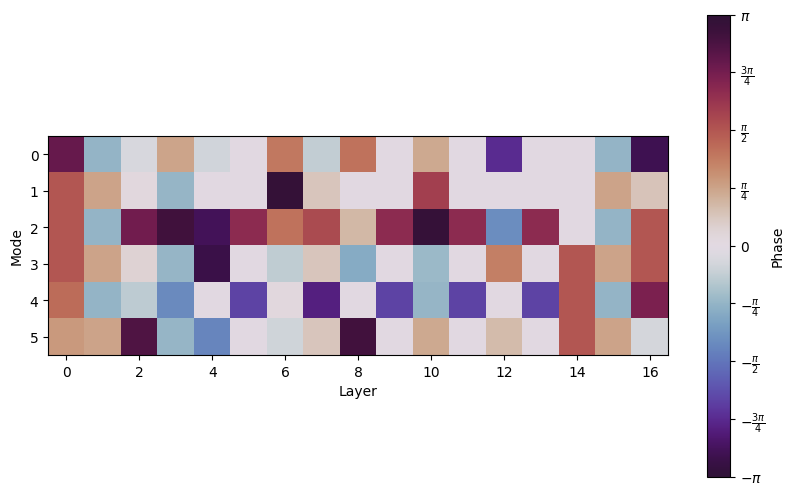

In [6]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# The `plot_phases` function adds a 2D colormap of the phases to the axis
plot_phases(decomposition, ax)

We can do the same thing with the Fourier decomposition of the DFT matrix.

<Axes: xlabel='Layer', ylabel='Mode'>

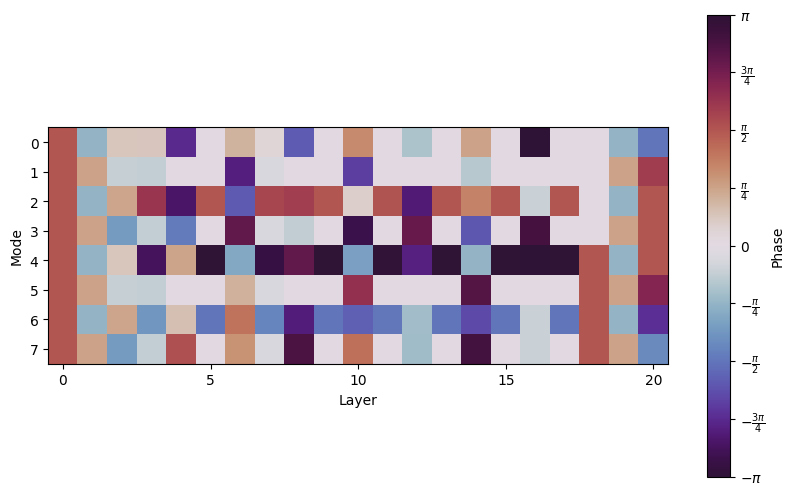

In [7]:
from scipy.linalg import dft

# Let U be the 20 x 20 DFT matrix
U = dft(8, scale="sqrtn")

# Perform the compact Fourier decomposition of the DFT matrix
decomposition = compact_fourier_decomposition(U)

# Plot the phases of the Fourier decomposition
fig, ax = plt.subplots(figsize=(10, 6))
plot_phases(decomposition, ax)

In [8]:
# Perform the compact Fourier decomposition
decomposition = compact_fourier_decomposition(U)

# The output is a `FourierDecomp` object
print("Output type:", type(decomposition).__name__, end="\n\n")

# Print the number of masks in the decomposition
print("Circuit lenght:", len(decomposition.mask_sequence) + 1, end="\n\n") # +1 accounts for the `D` matrix

# Print the phase masks in the decomposition. Note that the masks are given in the matrix multiplication order, i.e., the first mask is applied last in the circuit.
print("Masks in the decomposition:\n")
print("1:", 180*np.angle(decomposition.D)/np.pi)
for i, mask in enumerate(decomposition.mask_sequence):
    print(str(i+2) + ":", 180*np.angle(mask)/np.pi)

Output type: FourierDecomp

Circuit lenght: 21

Masks in the decomposition:

1: [ -90.     106.249   90.      90.      90.     125.913 -132.416  -75.585]
2: [-45.  45. -45.  45. -45.  45. -45.  45.]
3: [ 0.  0.  0.  0. 90. 90. 90. 90.]
4: [  0.   0.  90.   0. 180.   0. -90.   0.]
5: [-180.       0.     -19.665  160.335 -180.       0.     -19.665  -19.665]
6: [  0.   0.  90.   0. 180.   0. -90.   0.]
7: [  45.     -27.919   62.873 -108.04   -45.     152.081 -117.127  161.96 ]
8: [  0.   0.  90.   0. 180.   0. -90.   0.]
9: [ -32.784    0.    -147.216  141.752 -142.255    0.     -37.745  -38.248]
10: [   1.24   -1.24   91.24   -1.24 -178.76   -1.24  -88.76   -1.24]
11: [  58.76  -123.721   16.698 -165.783  -61.24   116.279 -103.302   74.217]
12: [  0.   0.  90.   0. 180.   0. -90.   0.]
13: [-105.734    0.     105.734  -22.892  144.795    0.    -144.795  157.108]
14: [   9.765   -9.765   99.765   -9.765 -170.235   -9.765  -80.235   -9.765]
15: [  35.235 -143.529 -107.084  144.934  -54.76